# Download and Import Dependencies
Joint task

In [ ]:
!pip install pandasql

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

# Data Retrieval
Joint task


In [ ]:
# from google.colab import drive
# drive.mount('/drive')
# %cd ..
# %cd /drive/MyDrive/DIC_PROJECT
# !ls

# comment this if you working locally. Assuming all the csv files are here locally where this ipynb file is located.
# csv files won't be committed and won't be seen in the changes as .csv files are in ignored.

In [2]:
Athlete_Events_Details = pd.read_csv('Olympic_Athlete_Event_Details.csv')
Event_Results = pd.read_csv('Olympic_Event_Results.csv')
Athlete_Biography = pd.read_csv('Olympic_Athlete_Biography.csv')
Medal_Tally = pd.read_csv('Olympic_Medal_Tally_History.csv')
Games_Summary = pd.read_csv('Olympic_Games_Summary.csv')
Population_Total = pd.read_csv('population_total_long.csv')
Country_Profile = pd.read_csv('Olympic_Country_Profiles.csv')

In [4]:
print('Athlete_Events_Details', Athlete_Events_Details.columns.tolist())
print('Event_Results', Event_Results.columns.tolist())
print('Athlete_Biography', Athlete_Biography.columns.tolist())
print('Medal_Tally', Medal_Tally.columns.tolist())
print('Games_Summary', Games_Summary.columns.tolist())
print('Population_Total', Population_Total.columns.tolist())

['edition', 'edition_id', 'country_noc', 'sport', 'event', 'result_id', 'athlete', 'athlete_id', 'pos', 'medal', 'isTeamSport']
['result_id', 'event_title', 'edition', 'edition_id', 'sport', 'sport_url', 'result_date', 'result_location', 'result_participants', 'result_format', 'result_detail', 'result_description']
['athlete_id', 'name', 'sex', 'born', 'height', 'weight', 'country', 'country_noc', 'description', 'special_notes']
['edition', 'edition_id', 'year', 'country', 'country_noc', 'gold', 'silver', 'bronze', 'total']
['edition', 'edition_id', 'edition_url', 'year', 'city', 'country_flag_url', 'country_noc', 'start_date', 'end_date', 'competition_date', 'isHeld']
['Country Name', 'Year', 'Count']


# Event Results Cleaning
Cleaned by Geetansh


In [ ]:
print(Event_Results.shape)
print(Event_Results.describe())
# print(Event_Results.head(10))

1. Removing duplicates if any.

In [ ]:
Event_Results.drop_duplicates(inplace=True)

2. Removing unwanted columns.


In [ ]:
Event_Results.drop(['sport_url','result_date','result_location','result_format','result_detail','result_description'], axis=1, inplace=True)

In [ ]:
print(Event_Results.shape)

3. Will convert all text fields to lower for consistency


In [ ]:
Event_Results['event_title'] = Event_Results['event_title'].str.strip().str.lower()
Event_Results['edition'] = Event_Results['edition'].str.strip().str.lower()
Event_Results['sport'] = Event_Results['sport'].str.strip().str.lower()
Event_Results['result_participants'] = Event_Results['result_participants'].str.strip().str.lower()

In [ ]:
print(Event_Results['result_participants'].head(10))

4. Creating new columns with total participants and total participating countries for each event

In [ ]:
Event_Results[['participants', 'participant_countries']] = Event_Results['result_participants'].str.extract(r'(\d+)\sfrom\s(\d+)')

Event_Results['participants'] = Event_Results['participants'].astype(int)
Event_Results['participant_countries'] = Event_Results['participant_countries'].astype(int)

Event_Results.drop('result_participants', axis=1, inplace=True)

print(Event_Results)

In [ ]:
print(Event_Results['participants'].head(10))
print(Event_Results['participant_countries'].head(10))

In [ ]:
print(Event_Results['event_title'].head(10))

5. Separating male and female events by adding a column for each men and women

In [ ]:
Event_Results['men'] = Event_Results['event_title'].str.contains(r'\bmen\b', case=False).astype(int)
Event_Results['women'] = Event_Results['event_title'].str.contains('women', case=False).astype(int)

print(Event_Results)

6. Extract year and olympic type from the data

In [ ]:
Event_Results[['year', 'olympic_type']] = Event_Results['edition'].str.extract(r'(\d{4})\s+(summer|winter)\s+olympics')

print(Event_Results['year'].head())
print(Event_Results['olympic_type'].head())

In [ ]:
print(Event_Results.shape)

7. Drop rows where essential columns are null

In [ ]:
Event_Results.dropna(subset=['event_title', 'sport', 'participants', 'participant_countries', 'men', 'women','year','olympic_type'], inplace=True)

In [ ]:
print(Event_Results)

8. One hot encode olympic type

In [ ]:
olympic_dummies = pd.get_dummies(Event_Results['olympic_type'])

olympic_dummies = olympic_dummies.astype(int)

Event_Results = pd.concat([Event_Results, olympic_dummies], axis=1)

print(Event_Results)

In [ ]:
print(Event_Results.shape)
print(Event_Results.describe())
print(Event_Results.head(10))

# Population Total Cleaning
Cleaned by Geetansh

In [ ]:
print(Population_Total.shape)
print(Population_Total.describe())
print(Population_Total.head(10))

1. Text columns to lower text

In [ ]:
Population_Total['Country Name'] = Population_Total['Country Name'].str.strip().str.lower()

In [ ]:
print(Population_Total.head(10))

2. Normalize Population Count

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# Population_Total[['Count']] = scaler.fit_transform(Population_Total[['Count']])

# print(Population_Total)

3. Drop rows if essential columns are null

In [ ]:
Population_Total.dropna(subset=['Country Name', 'Year', 'Count'], inplace=True)

In [ ]:
Population_Total['Year'] = Population_Total['Year'].replace(2017, 2020)

In [ ]:
print(Population_Total.shape)
print(Population_Total.describe())
print(Population_Total)

# Athlete_Biography Cleaning
Cleaned Sataakshi

In [ ]:
print(Athlete_Biography.shape)
print(Athlete_Biography.describe())
print(Athlete_Biography.head(10))

1. Dropping duplicates

In [ ]:
Athlete_Biography.drop_duplicates(inplace=True)

2. Dropping non required columns

In [ ]:
Athlete_Biography.drop(['description','special_notes'], axis=1, inplace=True)

3. Converting strings to lower

In [ ]:
Athlete_Biography['country'] = Athlete_Biography['country'].str.strip().str.lower()
Athlete_Biography['sex'] = Athlete_Biography['sex'].str.strip().str.lower()
Athlete_Biography['name'] = Athlete_Biography['name'].str.strip().str.lower()
Athlete_Biography['born'] = Athlete_Biography['born'].str.strip().str.lower()

In [ ]:
print(Athlete_Biography.head(10))

# Data Cleaning: Athlete_Events
Cleaned by Sataakshi

In [ ]:
Athlete_Events_Details.head(10)

In [ ]:
print(Athlete_Events_Details.isnull().sum())

In [ ]:
Athlete_Events_Details = Athlete_Events_Details.drop_duplicates()

In [ ]:
Athlete_Events_Details = Athlete_Events_Details.drop(columns=['result_id', 'athlete', 'pos'])

In [ ]:
Athlete_Events_Details['medal'].fillna('no medal', inplace=True)

In [ ]:
Athlete_Events_Details['country_noc'] = Athlete_Events_Details['country_noc'].str.strip().str.lower()
Athlete_Events_Details['sport'] = Athlete_Events_Details['sport'].str.strip().str.lower()
Athlete_Events_Details['event'] = Athlete_Events_Details['event'].str.strip().str.lower()
Athlete_Events_Details['edition'] = Athlete_Events_Details['edition'].str.strip().str.lower()

In [ ]:
Athlete_Events_Details.head(10)

In [ ]:
Athlete_Events_Details['edition'] = Athlete_Events_Details['edition'].astype('category')
Athlete_Events_Details['isTeamSport'] = Athlete_Events_Details['isTeamSport'].astype(bool)

In [ ]:
Athlete_Events_Details.head(10)

In [ ]:
Athlete_Events_Details[['year', 'olympic_type']] = Athlete_Events_Details['edition'].str.extract(r'(\d{4})\s+(summer|winter)\s+olympics')

print(Athlete_Events_Details['year'].head())
print(Athlete_Events_Details['olympic_type'].head())

In [ ]:
Athlete_Events_Details['men'] = Athlete_Events_Details['event'].str.contains(r'\bmen\b', case=False).astype(int)
Athlete_Events_Details['women'] = Athlete_Events_Details['event'].str.contains('women', case=False).astype(int)

Athlete_Events_Details.head(10)

In [ ]:
Athlete_Events_Details.head(10)

# Country_Profile Cleaning
Cleaned by Geetansh

Just doing to lower for all string datatype column.

In [ ]:
Country_Profile['noc'] = Country_Profile['noc'].str.strip().str.lower()
Country_Profile['country'] = Country_Profile['country'].str.strip().str.lower()

In [ ]:
print(Country_Profile.head(10))

# Exploratory Data Analysis (Geetansh 1)
> Percentage Women participation per country in Olympics


We'll first merge the data for country profile and athlete event details in order to get full country name. Then we'll drop unwanted columns from the merged data.

In [ ]:
print(Athlete_Events_Details.shape)
Athlete_Events_Details_Mod = Athlete_Events_Details.merge(Country_Profile, left_on='country_noc', right_on='noc', how='left')
Athlete_Events_Details_Mod.drop('noc', axis=1, inplace=True)
Athlete_Events_Details_Mod.drop('country_noc', axis=1, inplace=True)
print(Athlete_Events_Details_Mod.shape)
print(Athlete_Events_Details_Mod.head(10))

Now, we'll sum the number of male and female athletes.

In [ ]:
athlete_counts = Athlete_Events_Details_Mod.groupby(['country', 'year'])[['men', 'women']].sum().reset_index()
athlete_counts = athlete_counts.rename(columns={'country': 'Country Name'})

print(athlete_counts)

Percentage Women = Percentage women from overall population of the country. For this we'll merge our data with the total population dataset.
Percentage Women Better = Percentage women from total participants of the country.
Finally, we have country wise percentages.

In [ ]:
Population_Total['Year'] = Population_Total['Year'].astype(int)
athlete_counts['year'] = athlete_counts['year'].astype(int)
merged_data = pd.merge(athlete_counts, Population_Total, left_on=['Country Name', 'year'],right_on=['Country Name', 'Year'], how='left')

# print(merged_data)
merged_data['percentage_women'] = (merged_data['women'] / merged_data['Count']) * 100

merged_data['total'] = merged_data['men'] + merged_data['women']
merged_data['percentage_women_better'] = (merged_data['women'] / merged_data['total']) * 100

print(merged_data[['Country Name', 'year', 'percentage_women','percentage_women_better']].head(20))

merged_data.to_csv('country_women_participation_percentage.csv', index=False)

Normalizing percentage data as it was very small.

In [ ]:
merged_data = merged_data.dropna(subset=['percentage_women'])

min_val = merged_data['percentage_women'].min()
max_val = merged_data['percentage_women'].max()
merged_data['normalized_percentage_women'] = (merged_data['percentage_women'] - min_val) / (max_val - min_val)

print(merged_data)

We'll find out countrues with least percentage of women pariticipation.
Then we'll plot the trend of this data.


In [ ]:
total_percentage_by_country = merged_data.groupby('Country Name')['percentage_women'].sum().reset_index()

least_countries = total_percentage_by_country.nsmallest(5, 'percentage_women')['Country Name']

df_least = merged_data[merged_data['Country Name'].isin(least_countries)]


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_least, x='year', y='percentage_women', hue='Country Name', marker='o')
plt.title('Trends of Women Participation in Countries with Least Total Percentage')
plt.xlabel('Year')
plt.ylabel('Percentage of Women Participation')
plt.xticks(df_least['year'].unique())
plt.grid(True)
plt.xticks(rotation=90)
plt.legend(title='Country Name')
plt.show()

As we can see the trend increases after 1976 but is not rising countinously.

Now, we'll plot better percentage, which is out of total participants.

In [ ]:
total_percentage_by_country = merged_data.groupby('Country Name')['percentage_women'].sum().reset_index()

least_countries = total_percentage_by_country.nsmallest(5, 'percentage_women')['Country Name']

df_least = merged_data[merged_data['Country Name'].isin(least_countries)]


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_least, x='year', y='percentage_women_better', hue='Country Name', marker='o')
plt.title('Trends of Women Participation in Countries with Least Total Percentage')
plt.xlabel('Year')
plt.ylabel('Percentage of Women Participation')
plt.xticks(df_least['year'].unique())
plt.grid(True)
plt.xticks(rotation=90)
plt.legend(title='Country Name')
plt.show()

Now, we'll take some of the most successful sports countries in the world and try to plot both the percentages for these countries.

In [ ]:
selected_countries = ['united states', 'italy', 'germany', 'china', 'japan']
df_selected = merged_data[merged_data['Country Name'].isin(selected_countries)]
# df_selected = df_se.groupby('Country Name')['percentage_women'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='year', y='percentage_women', hue='Country Name', marker='o')
plt.title('Trends of Women Participation in Selected Countries')
plt.xlabel('Year')
plt.ylabel('Percentage of Women Participation')
plt.xticks(df_selected['year'].unique(), rotation=90)
plt.grid(True)
plt.yticks([])
plt.legend(title='Country Name')
plt.show()

We see better participation based on total population


Plot better percentage for women in the countries discussed above. We see a rising trend in these countries.

In [ ]:
selected_countries = ['united states', 'italy', 'germany', 'china', 'japan']
df_selected = merged_data[merged_data['Country Name'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='year', y='percentage_women_better', hue='Country Name', marker='o')
plt.title('Trends of Women Participation in Selected Countries')
plt.xlabel('Year')
plt.ylabel('Percentage of Women Participation')
plt.xticks(df_selected['year'].unique(), rotation=90)
plt.grid(True)
plt.legend(title='Country Name')
plt.show()

Conclusion :- The progressive countries are doing much better in terms of women participation and are improving too. The countries with low percentage should focus on empowering more women to play sports and this is a crucial piece of information for these countries to analyze.

# Exploratory Data Analysis (Geetansh 2)
> Identifying declining and on the rise sports


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

We'll focus on the summer olympics only for this particular EDA. Doing some more basic cleaning on the summer data.

In [ ]:
summer_data = Event_Results[Event_Results['summer'] == 1]

summer_data['year'] = pd.to_numeric(summer_data['year'], errors='coerce')
summer_data['participants'] = pd.to_numeric(summer_data['participants'], errors='coerce')

summer_data.dropna(subset=['year', 'participants'], inplace=True)
sport_year_participants = summer_data.groupby(['sport', 'year'])['participants'].sum().reset_index()

Here we are trying to identifying the sports with declining trends by calculating the slope of their trends. We are using participants as the metric here to identify trend and estimate popularity.

In [ ]:
trend_data = []
for sport, group in sport_year_participants.groupby('sport'):
    if len(group) < 2:
        continue
    slope, intercept, r_value, p_value, std_err = linregress(group['year'], group['participants'])
    trend_data.append({'sport': sport, 'slope': slope, 'p_value': p_value, 'group': group})

trend_df = pd.DataFrame(trend_data)

In [ ]:
declining_sports = trend_df[trend_df['slope'] < 0].sort_values('slope').head(10)

In [ ]:
print("\nTop 5 Sports with Declining Trends:")
print(declining_sports[['sport', 'slope']])

Plotting the top declining sports in the olympics.

In [ ]:
plt.figure(figsize=(12, 8))
for _, row in declining_sports.iterrows():
    sport_data = row['group']
    plt.plot(sport_data['year'], sport_data['participants'], marker='o', label=row['sport'])

plt.title('Top Declining Sports Participation Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend()
plt.grid()
plt.show()

Conclusion :- We see in the past the declining sports got extinct from the Olympics altogether. Now in the recent past we see some sports who's popularity is also declining. This is a major warning for the Olympic committee and for the world. We need to focus on spreading these declining sports so that they stay relevant.

Doing the same for increasing sports.

In [ ]:
increasing_sports = trend_df[trend_df['slope'] > 0].sort_values('slope').head(10)

In [ ]:
print("\nTop 10 Sports with Increasing Trends:")
print(declining_sports[['sport', 'slope']])

In [ ]:
plt.figure(figsize=(12, 8))
for _, row in increasing_sports.iterrows():
    sport_data = row['group']
    plt.plot(sport_data['year'], sport_data['participants'], marker='o', label=row['sport'])

plt.title('Top Increasing Sports Participation Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend()
plt.grid()
plt.show()

Conclusion :- We have these sports which are on the rise. This data is very useful for marketing and branding companies. There can be more money in these sports.

# Exploratory Data Analysis (Sataakshi 2)

> Country-wise Comparison of Team vs. Individual Sport Medals Over the Years

In [ ]:
!pip install pandasql


In [ ]:
import pandasql as ps

The SQL query extracts the year-wise medal count data for the USA from the Athlete_Events_Details table. It focuses on both individual and team sports, counting only the events where athletes won medals. Here’s what the query does step by step:

Columns Selected:

year: The specific year of the Olympic Games.
country_noc: The country code, filtered for the USA ('usa').
isTeamSport: Indicates whether the event was a team sport or an individual sport.

medal_count: The count of medals won by USA athletes in that year, for both team and individual sports.
Filtering:Excludes rows where the athlete did not win a medal (medal != 'no medal').Ensures that the year column is not null.

Grouping: Groups the results by year, country_noc, and isTeamSport, to get the total medal count for each year based on whether it was a team or individual sport.

Ordering:The results are ordered by year, country_noc, and isTeamSport to present the data in chronological order, further split into team and individual sport categories.

The queries below generates a summary of the various countries medal wins, categorized by year and sport type, allowing analysis of trends in team vs. individual performance over time.

In [ ]:
query_usa = """
    SELECT
    year,
    country_noc,
    isTeamSport,
    COUNT(medal) AS medal_count
    FROM Athlete_Events_Details
    WHERE medal != 'no medal'
    AND year IS NOT NULL
    AND country_noc IN ('usa')
    GROUP BY year, country_noc, isTeamSport
    ORDER BY year, country_noc, isTeamSport;
    """

medals_yearwise_data_usa = ps.sqldf(query_usa, locals())

print(medals_yearwise_data_usa)


In [ ]:
query_ger = """
    SELECT
    year,
    country_noc,
    isTeamSport,
    COUNT(medal) AS medal_count
    FROM Athlete_Events_Details
    WHERE medal != 'no medal'
    AND year IS NOT NULL
    AND country_noc IN ('ger')
    GROUP BY year, country_noc, isTeamSport
    ORDER BY year, country_noc, isTeamSport;
    """

medals_yearwise_data_ger = ps.sqldf(query_ger, locals())

print(medals_yearwise_data_ger)


In [ ]:
query_ita = """
    SELECT
    year,
    country_noc,
    isTeamSport,
    COUNT(medal) AS medal_count
    FROM Athlete_Events_Details
    WHERE medal != 'no medal'
    AND year IS NOT NULL
    AND country_noc IN ('ita')
    GROUP BY year, country_noc, isTeamSport
    ORDER BY year, country_noc, isTeamSport;
    """

medals_yearwise_data_ita = ps.sqldf(query_ita, locals())

print(medals_yearwise_data_ita)


In [ ]:
query_aus = """
    SELECT
    year,
    country_noc,
    isTeamSport,
    COUNT(medal) AS medal_count
    FROM Athlete_Events_Details
    WHERE medal != 'no medal'
    AND year IS NOT NULL
    AND country_noc IN ('aus')
    GROUP BY year, country_noc, isTeamSport
    ORDER BY year, country_noc, isTeamSport;
    """

medals_yearwise_data_aus = ps.sqldf(query_aus, locals())

print(medals_yearwise_data_aus)


In [ ]:
query_ind = """
    SELECT
    year,
    country_noc,
    isTeamSport,
    COUNT(medal) AS medal_count
    FROM Athlete_Events_Details
    WHERE medal != 'no medal'
    AND year IS NOT NULL
    AND country_noc IN ('ind')
    GROUP BY year, country_noc, isTeamSport
    ORDER BY year, country_noc, isTeamSport;
    """

medals_yearwise_data_ind = ps.sqldf(query_ind, locals())

print(medals_yearwise_data_ind)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colours = {True: 'red', False: 'blue'}

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=medals_yearwise_data_usa,
    x='year',
    y='medal_count',
    hue='isTeamSport',
    palette=colours,
    markers=True,
    dashes=False
)

plt.title('Year-wise Team vs Individual Sport Medals: USA', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.legend(title='Country (Team vs Individual)', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Interpretation**: The USA has consistently excelled in team sports, with the medal count for team events always surpassing that of individual sports. At no point in time have individual athletes outperformed the team in terms of total medals. This trend is clearly reflected in the graph, where team sports (in red) consistently show a higher medal count compared to individual sports (in blue) across all years.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colours = {True: 'red', False: 'blue'}

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=medals_yearwise_data_ger,
    x='year',
    y='medal_count',
    hue='isTeamSport',
    palette=colours,
    markers=True,
    dashes=False
)

plt.title('Year-wise Team vs Individual Sport Medals: GER', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.legend(title='Country (Team vs Individual)', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



**Interpretation**: Germany has consistently excelled in team sports, with the medal count for team events always surpassing that of individual sports. There has always been a significant gap between the two, indicating that individual athletes have never outperformed the team in terms of total medals. This trend is clearly illustrated in the graph, where team sports (in red) consistently show a higher medal count compared to individual sports (in blue) across all years.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colours = {True: 'red', False: 'blue'}

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=medals_yearwise_data_ita,
    x='year',
    y='medal_count',
    hue='isTeamSport',
    palette=colours,
    markers=True,
    dashes=False
)

plt.title('Year-wise Team vs Individual Sport Medals: ITA', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.legend(title='Country (Team vs Individual)', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colours = {True: 'red', False: 'blue'}

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=medals_yearwise_data_aus,
    x='year',
    y='medal_count',
    hue='isTeamSport',
    palette=colours,
    markers=True,
    dashes=False
)

plt.title('Year-wise Team vs Individual Sport Medals: AUS', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.legend(title='Country (Team vs Individual)', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



**Interpretation**: Except a few years Australia has also always been ahead in team sports. Given the potential, Australia can dedicate their energy towards also increasing the individual medal count

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colours = {True: 'red', False: 'blue'}

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=medals_yearwise_data_ind,
    x='year',
    y='medal_count',
    hue='isTeamSport',
    palette=colours,
    markers=True,
    dashes=False
)

plt.title('Year-wise Team vs Individual Sport Medals: IND', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.legend(title='Country (Team vs Individual)', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



**Interpretation**: For India there is a significant gap in the team sports and individual spots performance. This graph can motivate the country to reduce this gap and prepare for the forthecoming olympics.

# Exploratory Data Analysis (Sataakshi 1)

> Sport-wise Trend of Women’s Participation Over the Years

In this analysis, we examine the participation of women in various sports across different Olympic years using the Athlete_Events_Details dataset. The SQL query retrieves the count of female athletes participating in each sport for every Olympic year, focusing on events where women were represented.


In [ ]:
query = """
    SELECT
    sport,
    year,
    COUNT(athlete_id) AS women_participation_count
FROM Athlete_Events_Details
WHERE
    women = 1
    AND year IS NOT NULL
GROUP BY sport, year
ORDER BY year ASC, women_participation_count ;
    """

women_participation = ps.sqldf(query, locals())

print(women_participation)

The data is filtered to include only instances where women participated, ensuring accurate counts for each sport. The results are grouped by sport and year, providing a clear overview of trends in women’s participation over time.

For each selected sport, a line plot visualizes the year-wise participation count of female athletes, allowing for a comparison of trends and growth in women's representation across different sports. This analysis helps to highlight advancements in gender equality in sports and can identify specific sports where women’s participation has significantly increased or decreased over the years.

The following visualization focuses on women's participation in wrestling, showcasing how participation has evolved through the years.

In [ ]:
selected_sport = 'wrestling'
filtered_sport_data = women_participation[women_participation['sport'] == selected_sport]

plt.figure(figsize=(5, 4))
sns.lineplot(
    data=filtered_sport_data,
    x='year',
    y='women_participation_count',
    marker='o',
    dashes=False
)

plt.title(f'Year-wise Women Participation in {selected_sport}', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Women Participation Count', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The following visualization focuses on women's participation in alpine skiing, showcasing how participation has evolved through the years.

In [ ]:
selected_sport = 'alpine skiing'
filtered_sport_data = women_participation[women_participation['sport'] == selected_sport]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=filtered_sport_data,
    x='year',
    y='women_participation_count',
    marker='o',
    dashes=False
)

plt.title(f'Year-wise Women Participation in {selected_sport}', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Women Participation Count', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The following visualization focuses on women's participation in badminton, showcasing how participation has evolved through the years.

In [ ]:

selected_sport = 'badminton'
filtered_sport_data = women_participation[women_participation['sport'] == selected_sport]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=filtered_sport_data,
    x='year',
    y='women_participation_count',
    marker='o',
    dashes=False
)

plt.title(f'Year-wise Women Participation in {selected_sport}', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Women Participation Count', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The following visualization focuses on women's participation in athletics, showcasing how participation has evolved through the years.

In [ ]:
selected_sport = 'athletics'
filtered_sport_data = women_participation[women_participation['sport'] == selected_sport]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=filtered_sport_data,
    x='year',
    y='women_participation_count',
    marker='o',
    dashes=False
)

plt.title(f'Year-wise Women Participation in {selected_sport}', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Women Participation Count', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Exploratory Data Analysis (Rudraksh 1)

> Table Tennis and Tennis are similar yet different sports. The players we have seen in both games seem to have different builds. The hypothesis is that we can build a model using Height, Weight, and athlete’s country to predict which sport they belong to.

In [89]:
Athletes_Data = Athlete_Events_Details.copy()
Athletes_Data = Athletes_Data[Athletes_Data['olympic_type'] == 'summer']
Athletes_Data = pd.merge(Athletes_Data, Athlete_Biography, on='athlete_id', how='left')
Athletes_Data['sex'] = Athletes_Data.apply(lambda row: 'M' if row['men'] == 1 else 'F', axis=1)
Athletes_Data['birth_year'] = Athletes_Data['born'].str.extract(r'(\d{4})')
Athletes_Data['birth_year'] = pd.to_numeric(Athletes_Data['birth_year'], errors='coerce')
Athletes_Data['year'] = pd.to_numeric(Athletes_Data['year'], errors='coerce')
Athletes_Data['age'] = Athletes_Data['year'] - Athletes_Data['birth_year']

Athletes_Data = Athletes_Data[['age', 'country', 'year', 'sex', 'sport', 'height', 'weight', 'medal', 'isTeamSport']]

Athletes_Data['height'] = pd.to_numeric(Athletes_Data['height'], errors='coerce')
Athletes_Data['weight'] = pd.to_numeric(Athletes_Data['weight'], errors='coerce')

Athletes_Data = Athletes_Data.dropna(subset=['height', 'weight', 'medal', 'age', 'country'])

Athletes_Data_Male = Athletes_Data[Athletes_Data['sex'] == 'M']
Athletes_Data_Female = Athletes_Data[Athletes_Data['sex'] == 'F']

sports = ['tennis', 'table tennis']
Athletes_Data_Male_Popular = Athletes_Data_Male[Athletes_Data_Male['sport'].isin(sports)]
Athletes_Data_Female_Popular = Athletes_Data_Female[Athletes_Data_Female['sport'].isin(sports)]

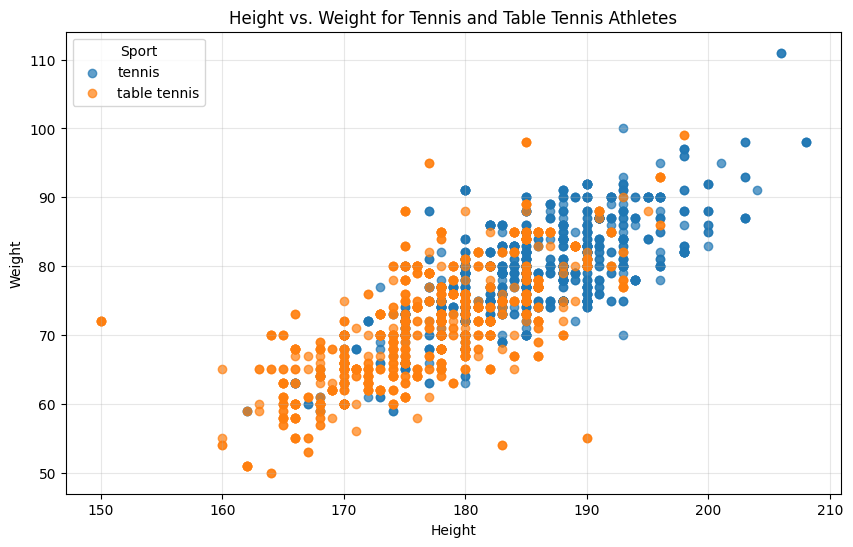

In [90]:
plt.figure(figsize=(10, 6))
for sport in sports:
    sport_data = Athletes_Data_Male_Popular[Athletes_Data_Male_Popular['sport'] == sport]
    plt.scatter(sport_data['height'], sport_data['weight'], label=sport, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight for Tennis and Table Tennis Athletes')
plt.legend(title='Sport')
plt.grid(alpha=0.3)

# Show the plot
plt.show()

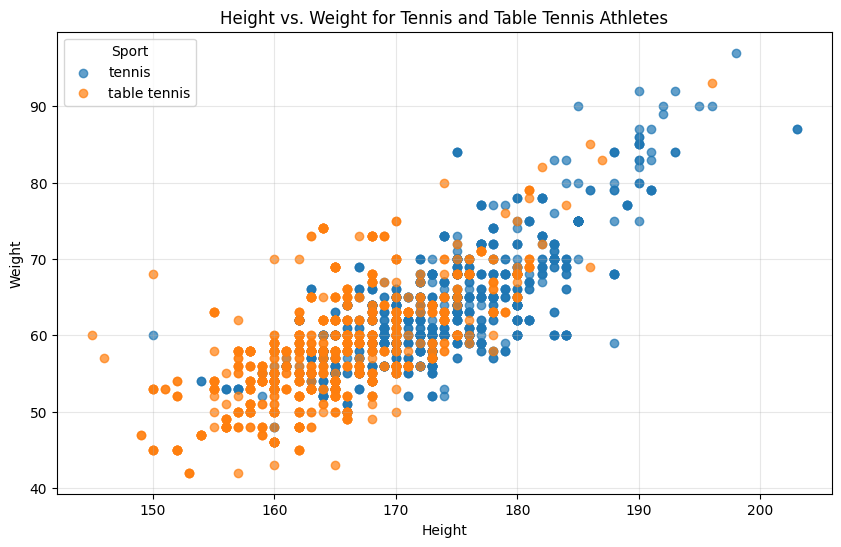

In [102]:
plt.figure(figsize=(10, 6))
for sport in sports:
    sport_data = Athletes_Data_Female_Popular[Athletes_Data_Female_Popular['sport'] == sport]
    plt.scatter(sport_data['height'], sport_data['weight'], label=sport, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight for Tennis and Table Tennis Athletes')
plt.legend(title='Sport')
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Exploratory Data Analysis (Rudraksh 2)

> n athletics, height, weight, age, and country are major
indicators for success in the Olympics. We have made several
machine-learning models, which can help in predicting the
chances of getting a medal in Athletics.

In [91]:
athletics_data = Athletes_Data[Athletes_Data['sport'] == 'athletics']
athletics_data['has_medal'] = athletics_data['medal'].apply(lambda x: 1 if x != 'no medal' else 0)

/var/folders/4s/nf4ptsw94lq60sq55ldm8pr00000gn/T/ipykernel_78321/2218917410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletics_data['has_medal'] = athletics_data['medal'].apply(lambda x: 1 if x != 'no medal' else 0)


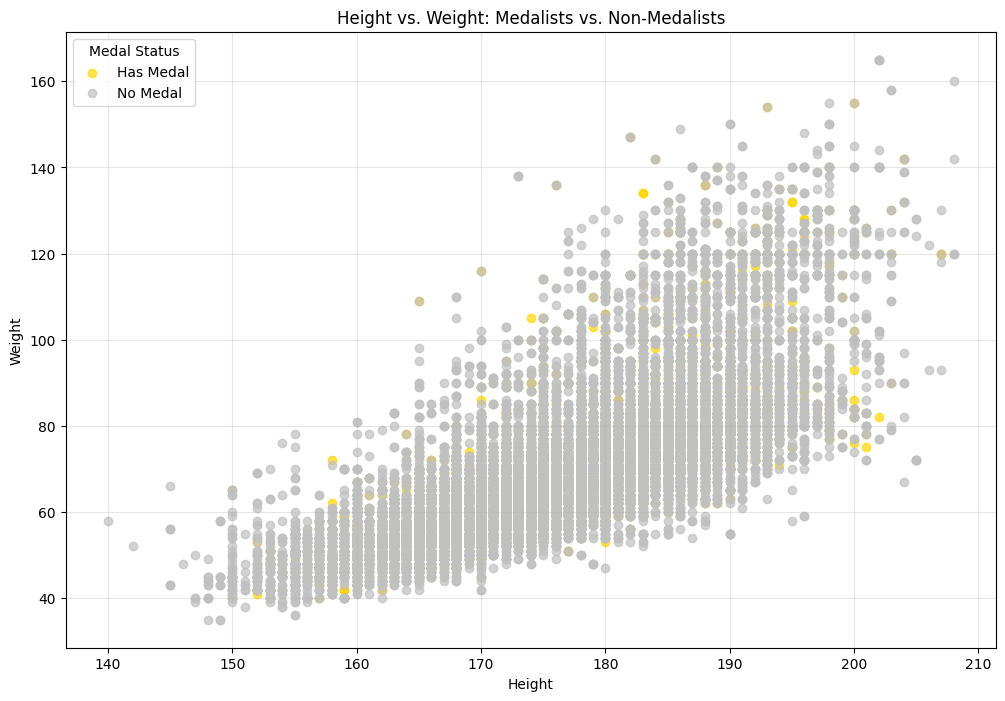

In [95]:
plt.figure(figsize=(12, 8))

medal_data = athletics_data[athletics_data['has_medal'] == 1]
no_medal_data = athletics_data[athletics_data['has_medal'] == 0]

plt.scatter(medal_data['height'], medal_data['weight'], color='gold', label='Has Medal', alpha=0.7)

plt.scatter(no_medal_data['height'], no_medal_data['weight'], color='silver', label='No Medal', alpha=0.7)

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight: Medalists vs. Non-Medalists')
plt.legend(title='Medal Status')
plt.grid(alpha=0.3)

# Show the plot
plt.show()


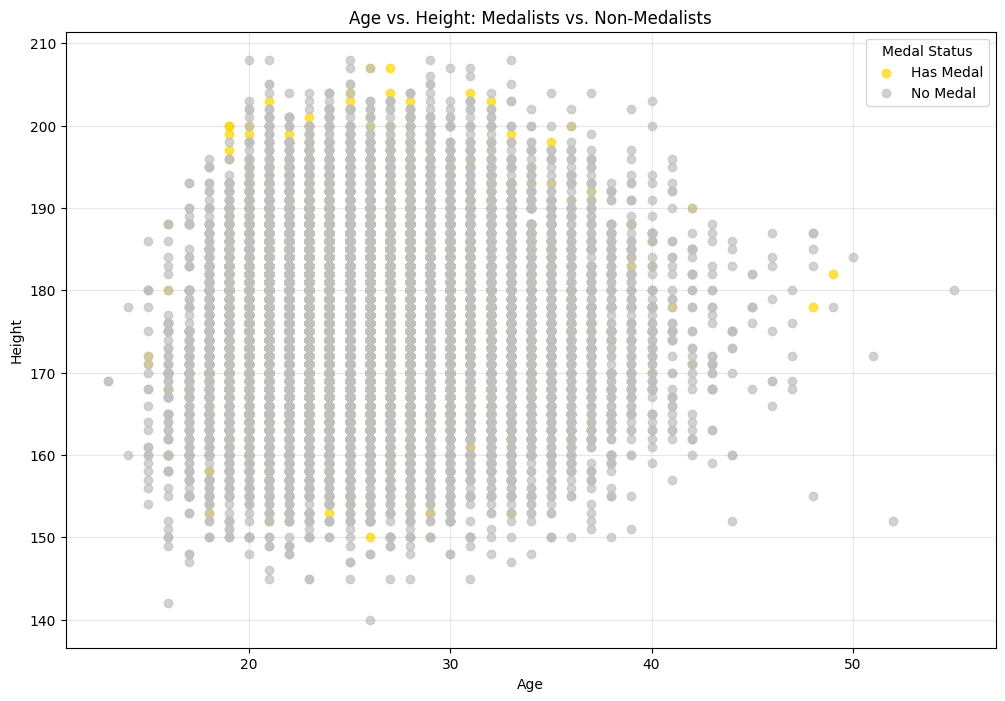

In [101]:
plt.figure(figsize=(12, 8))

medal_data = athletics_data[athletics_data['has_medal'] == 1]
no_medal_data = athletics_data[athletics_data['has_medal'] == 0]

plt.scatter(medal_data['age'], medal_data['height'], color='gold', label='Has Medal', alpha=0.7)

plt.scatter(no_medal_data['age'], no_medal_data['height'], color='silver', label='No Medal', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Age vs. Height: Medalists vs. Non-Medalists')
plt.legend(title='Medal Status')
plt.grid(alpha=0.3)

# Show the plot
plt.show()


# ML Models (Geetansh 1)
> Percentage Women participation per country in Olympics

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Pre processing dataset.

In [ ]:
merged_data = merged_data.dropna(subset=['percentage_women_better'])
average_participation = merged_data.groupby('Country Name')['percentage_women_better'].mean().reset_index()

top_countries = average_participation.sort_values(by='percentage_women_better', ascending=False).head(20)
df_filtered = merged_data[merged_data['Country Name'].isin(top_countries['Country Name'])]

df_filtered = df_filtered[df_filtered['year'] >= 1960]
train_data = df_filtered[df_filtered['year'] <= 2000]
test_data = df_filtered[df_filtered['year'] > 2000]

X_train = train_data[['year']]
y_train = train_data['percentage_women_better']
X_test = test_data[['year']]
y_test = test_data['percentage_women_better']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Creating DNN and fitting the input in model

In [ ]:

def create_dnn_model():
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

dnn_model = create_dnn_model()
dnn_model.fit(X_train_scaled, y_train, epochs=150, batch_size=4, verbose=1)

Predictions and evaluation metrics

In [ ]:

y_pred = dnn_model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

future_years = np.array([2024, 2028, 2032, 2036, 2040]).reshape(-1, 1)
future_years_scaled = scaler.transform(future_years)
future_pred = dnn_model.predict(future_years_scaled)

Plotting

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['year'], y_train, color='blue', label='Train Data')
plt.scatter(test_data['year'], y_test, color='green', label='Actual Test Data')
plt.scatter(test_data['year'], y_pred, color='red', label='Predicted Test Data')
plt.plot(future_years, future_pred, 'o--', label='Future Predictions')
plt.xlabel('Year')
plt.ylabel('Percentage of Women Participation')
plt.title('DNN Predictions for Women Participation (Top 50 Countries)')
plt.legend()
plt.grid(True)
plt.show()

abs_r2 = abs(r2)
print(f"Absolute R² Score: {abs_r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Future Predictions (2024-2040): {future_pred.flatten()}")

Now, we'll do the same thing we have done above for specific countries.

In [ ]:
target_countries = [ 'Netherlands', 'Peru', 'Canada', 'Singapore', 'Romania','malta','angola']

fig, axes = plt.subplots(len(target_countries), 1, figsize=(10, 4 * len(target_countries)), sharex=True)
fig.suptitle('DNN Predictions for Women Participation by Country')

for i, country in enumerate(target_countries):
    country_data = df_filtered[df_filtered['Country Name'].str.lower() == country.lower()]

    country_train_data = country_data[country_data['year'] <= 2000]
    country_test_data = country_data[country_data['year'] > 2000]

    X_train_country = country_train_data[['year']]
    y_train_country = country_train_data['percentage_women_better']
    X_test_country = country_test_data[['year']]
    y_test_country = country_test_data['percentage_women_better']
    X_train_country_scaled = scaler.transform(X_train_country)
    X_test_country_scaled = scaler.transform(X_test_country)

    y_pred_country = dnn_model.predict(X_test_country_scaled)



    future_pred_country = dnn_model.predict(future_years_scaled)



    ax = axes[i]
    ax.scatter(country_train_data['year'], y_train_country, color='blue', label='Train Data')
    ax.scatter(country_test_data['year'], y_test_country, color='green', label='Actual Test Data')
    ax.scatter(country_test_data['year'], y_pred_country, color='red', label='Predicted Test Data')
    ax.plot(future_years, future_pred_country, 'o--', label='Future Predictions')

    ax.set_title(f"{country}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage of Women Participation')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# ML Models (Geetansh 2)
> Identifying declining and on the rise sports

In [ ]:
from scipy.stats import linregress
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

Doing pre processing for dataset

In [ ]:
Event_Results['year'] = pd.to_numeric(Event_Results['year'], errors='coerce')
Event_Results['participants'] = pd.to_numeric(Event_Results['participants'], errors='coerce')

Event_Results = Event_Results.dropna(subset=['year', 'participants'])

Now, we'll try to calculate the slope.

In [ ]:
sports_multiple_years = Event_Results.groupby('sport').filter(lambda x: x['year'].nunique() > 1)

sports_trend = sports_multiple_years.groupby('sport').apply(lambda df: linregress(df['year'], df['participants']).slope).reset_index()
sports_trend.columns = ['sport', 'slope']

sport_stats = sports_multiple_years.groupby('sport')['participants'].agg(['mean', 'std']).reset_index()
sports_trend = sports_trend.merge(sport_stats, on='sport')


Formalizing input, hyperparameters, applying Kmeans and putting in labels.

In [ ]:
X = sports_trend[['slope', 'mean']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
sports_trend['cluster'] = kmeans.fit_predict(X_scaled)

cluster_labels = {0: "rising", 1: "declining"} if sports_trend.groupby('cluster')['slope'].mean()[0] > 0 else {0: "declining", 1: "rising"}
sports_trend['trend_label'] = sports_trend['cluster'].map(cluster_labels)

Calculating Evaluation metrics.

In [ ]:
silhouette_avg = silhouette_score(X_scaled, sports_trend['cluster'])
davies_bouldin = davies_bouldin_score(X_scaled, sports_trend['cluster'])
inertia = kmeans.inertia_

Plotting the final output and printing metrics.

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sports_trend, x='slope', y='mean', hue='trend_label', style='trend_label', palette='viridis', s=100)
plt.title("Clustering of Sports by Rising and Declining Trends")
plt.xlabel("Trend Slope")
plt.ylabel("Average Participation")
plt.grid(True)
plt.legend(title='Trend')
plt.show()

sports_trend[['sport', 'slope', 'mean', 'std', 'trend_label']]
print(sports_trend)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Inertia: {inertia}")

# ML Model (Sataakshi 1)

> Sport-wise Trend of Women’s Participation Over the Years

In [ ]:
query = """
    SELECT
        sport,
        year,
        COUNT(athlete_id) AS women_participation_count
    FROM Athlete_Events_Details
    WHERE
        women = 1
        AND year IS NOT NULL
    GROUP BY sport, year
    ORDER BY sport, year ASC;
"""

women_participation = ps.sqldf(query, locals())

print(women_participation.head())
plt.figure(figsize=(12, 8))

sns.lineplot(data=women_participation, x='year', y='women_participation_count', hue='sport', marker='o', dashes=False)

plt.title('Year-wise Women Participation in All Sports', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Women Participation Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sport', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
query = """
    SELECT
        sport,
        COUNT(DISTINCT year) AS years_practiced
    FROM Athlete_Events_Details
    WHERE
        women = 1
        AND year IS NOT NULL
    GROUP BY sport
    ORDER BY years_practiced DESC
    LIMIT 5;  -- Or adjust to any number
"""

topSports = ps.sqldf(query, locals())

print(topSports)


We have taken a list of sports which had maximum data over the course of olympic history.
Such sports include swimming, diving, fencing, athletics. These four sports are known to be some of the oldest sports in the olympic history.

Next, we are going to iterate over every sport and filter the required data. Using the KNN model we will split the data and use the Knn regression to calculate the preedicted value.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of sports
sports = [ 'swimming', 'diving', 'fencing', 'athletics']

rmseVal = {}
r2Val = {}

# Loop over each sport to train and evaluate the k-NN model.
for idx, sport in enumerate(sports):

    # Filter data for the current sport.
    participationData = women_participation[women_participation['sport'] == sport]

    X = participationData[['year']]
    y = participationData['women_participation_count']

    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    XTrainScaled = scaler.fit_transform(XTrain)
    XTestScaled = scaler.transform(XTest)

    knnReg = KNeighborsRegressor(min(5, len(XTrain)))
    knnReg.fit(XTrainScaled, yTrain)

    yPredKnn = knnReg.predict(XTestScaled)

    # Calculate RMSE and R² score
    rmseKnn = np.sqrt(mean_squared_error(yTest, yPredKnn))
    r2Knn = r2_score(yTest, yPredKnn)

    rmseVal[sport] = rmseKnn
    r2Val[sport] = r2Knn

    print(f"{sport.capitalize()} Results")
    print(f'R² score: {r2Knn:.2f}')
    print(f'Root Mean Square Error: {rmseKnn:.2f}')

    sortedVal = np.argsort(X_test.values.flatten())
    XTestSorted = X_test.values.flatten()[sortedVal]
    yTestSorted = y_test.values.flatten()[sortedVal]
    yPredKnnSorted = yPredKnn[sortedVal]

    plt.figure(figsize=(8, 5))

    # Plot actual vs predicted values for the current sport
    plt.plot(XTestSorted, yTestSorted, color='blue', label=f'Actual {sport.capitalize()}')
    plt.plot(XTestSorted, yPredKnnSorted, color='red', linestyle='dashed', label=f'Predicted {sport.capitalize()}')

    plt.title(f"k-NN Regression - Women Participation in {sport.capitalize()}", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("Women's Participation Count")
    plt.legend(loc='upper left', fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

print("\nOverall Results:")
for sport in sports:
    if sport in rmseVal:
        print(f"{sport.capitalize()} -> RMSE: {rmseVal[sport]:.2f}, R²: {r2Val[sport]:.2f}")


The output indicates the performance of the k-NN regression model for predicting women's participation in four sports:

Results per Sport:

Swimming:-

R²: 0.73 - The model explains 73% of the variance in swimming participation.

RMSE: 125.06 - The model's predictions are off by an average of 125.06 units.

Diving:-

R²: 0.77 - The model explains 77% of the variance in diving participation.

RMSE: 10.88 - The predictions are off by an average of 10.88 units.

Fencing:-

R²: 0.59 - The model explains 59% of the variance in fencing participation.

RMSE: 32.65 - The predictions are off by an average of 32.65 units.

Athletics:-

R²: 0.89 - The model explains 89% of the variance in athletics participation.

RMSE: 131.02 - The predictions are off by an average of 131.02 units.

Overall Summary:

Swimming and Athletics show strong model performance. R² values of 0.73 and 0.89. However, Athletics has a higher RMSE, indicating larger prediction errors compared to Diving and Fencing.
Diving has the best balance of a relatively high R² (0.77) and a low RMSE (10.88), suggesting the model makes accurate predictions for diving.
Fencing has the lowest R² (0.59) and a moderate RMSE (32.65), indicating room for improvement in the model's performance.
The plots show how well the k-NN model captures the trend of participation for each sport over time. The dashed red line represents the predicted values, while the blue line represents the actual participation data.

# ML Model (Sataakshi 2)

> Country-wise Comparison of Team vs. Individual Sport Medals Over the Years


1.   Split dataset into training 80% and testing 20%

2.   Max depth set to 5 to avoid overfitting

3. Using plot tree to visualize decision tree.

4. R² score measures the variance in the data

5. Mean Squared Error masures the average squared difference between the predicted and actual values.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

medals_yearwise_data_aus['isTeamSport'] = medals_yearwise_data_aus['isTeamSport'].apply(lambda x: 1 if x else 0)

X = medals_yearwise_data_aus[['year', 'isTeamSport']]
y = medals_yearwise_data_aus['medal_count']

# Split dataset into training 80% and testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Max depth set to 5 to avoid overfitting
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

reg_tree.fit(X_train, y_train)

plt.figure(figsize=(10, 8))

# Using plot tree to visualize decision tree
plot_tree(reg_tree, feature_names=['year', 'isTeamSport'], filled=True)
plt.show()

y_pred_tree = reg_tree.predict(X_test)
print("Decision Tree-")

# R² score measures the variance in the data
print(f'R² score: {r2_score(y_test, y_pred_tree)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_tree)}')
print("-------------")

reg_random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

reg_random_forest.fit(X_train, y_train)

y_pred_rf = reg_random_forest.predict(X_test)
print("Random Forest Results- ")

# Mean Squared Error masures the average squared difference between the predicted and actual values.
print(f'R² score: {r2_score(y_test, y_pred_rf)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}')



The output shows the performance of two regression models—Decision Tree and Random Forest—in predicting Australia's medal counts.

Decision Tree:

R² score: 0.36, indicating that the model explains about 36% of the variance in the data.

Mean Squared Error (MSE): 834.71, which represents the average squared difference between actual and predicted medal counts.

Random Forest:

R² score: 0.51, meaning it explains 51% of the variance, making it a better model compared to the Decision Tree.

MSE: 641.43, which is lower than the Decision Tree, indicating better prediction accuracy.

Overall, the Random Forest performs better than the Decision Tree, offering higher accuracy and better variance explanation.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

medals_yearwise_data_ind['isTeamSport'] = medals_yearwise_data_ind['isTeamSport'].apply(lambda x: 1 if x else 0)

X = medals_yearwise_data_ind[['year', 'isTeamSport']]
y = medals_yearwise_data_ind['medal_count']

# Split dataset into training 80% and testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Max depth set to 5 to avoid overfitting
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

reg_tree.fit(X_train, y_train)

plt.figure(figsize=(10, 8))

# Using plot tree to visualize decision tree
plot_tree(reg_tree, feature_names=['year', 'isTeamSport'], filled=True)
plt.show()

y_pred_tree = reg_tree.predict(X_test)
print("Decision Tree-")

# R² score measures the variance in the data
print(f'R² score: {r2_score(y_test, y_pred_tree)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_tree)}')
print("-------------")

reg_random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

reg_random_forest.fit(X_train, y_train)

y_pred_rf = reg_random_forest.predict(X_test)
print("Random Forest Results- ")

# Mean Squared Error masures the average squared difference between the predicted and actual values.
print(f'R² score: {r2_score(y_test, y_pred_rf)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}')



The output for India indicates that both models-Decision Tree and Random Forest perform well.

Decision Tree:-

R² score: 0.88 meaning 88% of the variance in the data is explained by the model.

Mean Squared Error: 8.4 shows the average squared difference between the predicted and actual values.

Random Forest:-

R² score: 0.92 means that there is a slight improvement, meaning the model explains 92% of the variance.

Mean Squared Error: The lower MSE value of 5.7 shows that Random Forest makes more accurate predictions than the Decision Tree in this case.

In summary, both models perform well, with Random Forest slightly outperforming the Decision Tree in predictive accuracy.

# ML Models Both (Rudraksh)

In [96]:
# Problem 1
# Table Tennis and Tennis are similar yet different sports. The players I have seen in both games seem to have different builds. The hypothesis is that we can build a model using Height, Weight, and athlete’s country to predict which sport they belong to.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = Athletes_Data_Male_Popular[['height', 'weight', 'country']]
y = Athletes_Data_Male_Popular['sport']

country_encoder = LabelEncoder()
X['country'] = country_encoder.fit_transform(X['country'])

sport_encoder = LabelEncoder()
y = sport_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/4s/nf4ptsw94lq60sq55ldm8pr00000gn/T/ipykernel_78321/664141186.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['country'] = country_encoder.fit_transform(X['country'])


In [97]:

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

!pip install xgboost
from xgboost import XGBClassifier

print("--------------------Logistic Regression results------------------------------")

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr, target_names=sport_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred_lr)}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr, average='weighted')}")

print("--------------------KNN results------------------------------")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn, target_names=sport_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred_knn)}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn, average='weighted')}")

print("--------------------SVM results----------------------------------------")
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm, target_names=sport_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred_svm)}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted')}")

print("--------------------Random Forest results------------------------------")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names=sport_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted')}")

print("--------------------Gradient Boost results-----------------------------")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(classification_report(y_test, y_pred_gb, target_names=sport_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred_gb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_gb, average='weighted')}")

print("--------------------XGBoost results------------------------------")
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb, target_names=sport_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred_xgb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb, average='weighted')}")

--------------------Logistic Regression results------------------------------
              precision    recall  f1-score   support

table tennis       0.73      0.64      0.68       208
      tennis       0.69      0.77      0.72       214

    accuracy                           0.70       422
   macro avg       0.71      0.70      0.70       422
weighted avg       0.71      0.70      0.70       422

Accuracy: 0.7037914691943128
Confusion Matrix: [[133  75]
 [ 50 164]]
F1 Score: 0.7024954115881611
--------------------KNN results------------------------------
              precision    recall  f1-score   support

table tennis       0.83      0.85      0.84       208
      tennis       0.85      0.84      0.84       214

    accuracy                           0.84       422
   macro avg       0.84      0.84      0.84       422
weighted avg       0.84      0.84      0.84       422

Accuracy: 0.8436018957345972
Confusion Matrix: [[177  31]
 [ 35 179]]
F1 Score: 0.8436089217051392
--------

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = Athletes_Data_Female_Popular[['height', 'weight', 'country']]
y = Athletes_Data_Female_Popular['sport']

country_encoder = LabelEncoder()
X['country'] = country_encoder.fit_transform(X['country'])

sport_encoder = LabelEncoder()
y = sport_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/4s/nf4ptsw94lq60sq55ldm8pr00000gn/T/ipykernel_78321/2636862229.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['country'] = country_encoder.fit_transform(X['country'])


In [99]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

!pip install xgboost
from xgboost import XGBClassifier

print("--------------------Logistic Regression results------------------------------")

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr, target_names=sport_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred_lr)}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr, average='weighted')}")

print("--------------------KNN results------------------------------")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn, target_names=sport_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred_knn)}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn, average='weighted')}")

print("--------------------SVM results----------------------------------------")
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm, target_names=sport_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred_svm)}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted')}")

print("--------------------Random Forest results------------------------------")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names=sport_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted')}")

print("--------------------Gradient Boost results-----------------------------")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(classification_report(y_test, y_pred_gb, target_names=sport_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred_gb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_gb, average='weighted')}")

print("--------------------XGBoost results------------------------------")
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb, target_names=sport_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred_xgb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb, average='weighted')}")

--------------------Logistic Regression results------------------------------
              precision    recall  f1-score   support

table tennis       0.69      0.68      0.69       190
      tennis       0.73      0.74      0.73       223

    accuracy                           0.71       413
   macro avg       0.71      0.71      0.71       413
weighted avg       0.71      0.71      0.71       413

Accuracy: 0.711864406779661
Confusion Matrix: [[130  60]
 [ 59 164]]
F1 Score: 0.7118065799885086
--------------------KNN results------------------------------
              precision    recall  f1-score   support

table tennis       0.81      0.78      0.79       190
      tennis       0.82      0.84      0.83       223

    accuracy                           0.81       413
   macro avg       0.81      0.81      0.81       413
weighted avg       0.81      0.81      0.81       413

Accuracy: 0.8135593220338984
Confusion Matrix: [[149  41]
 [ 36 187]]
F1 Score: 0.8133498690919112
---------

In [100]:
#Problem 2
# In athletics, height, weight, age, and country are major indicators of success in the Olympics. We have made models to achieve the same. (Predict the success/failure of athletics based on their height weight, and Country they belong to.)

X = athletics_data[['height', 'weight', 'age', 'country']]
y = athletics_data['has_medal']

country_encoder = LabelEncoder()
X['country'] = country_encoder.fit_transform(X['country'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"---{name}---")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")

/var/folders/4s/nf4ptsw94lq60sq55ldm8pr00000gn/T/ipykernel_78321/3156714820.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['country'] = country_encoder.fit_transform(X['country'])
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

---Logistic Regression---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6577
           1       0.00      0.00      0.00       834

    accuracy                           0.89      7411
   macro avg       0.44      0.50      0.47      7411
weighted avg       0.79      0.89      0.83      7411

Accuracy: 0.8874645796788557
F1 Score: 0.8345516929579404
---KNN---
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6577
           1       0.39      0.13      0.20       834

    accuracy                           0.88      7411
   macro avg       0.64      0.55      0.56      7411
weighted avg       0.84      0.88      0.85      7411

Accuracy: 0.878693833490757
F1 Score: 0.8512130568092595
---SVM---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6577
           1       0.00      0.00      0.00       834

    accuracy         

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


---Random Forest---
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6577
           1       0.37      0.20      0.26       834

    accuracy                           0.87      7411
   macro avg       0.64      0.58      0.60      7411
weighted avg       0.84      0.87      0.85      7411

Accuracy: 0.8719471056537579
F1 Score: 0.8549147414440205
---Gradient Boosting---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6577
           1       1.00      0.00      0.00       834

    accuracy                           0.89      7411
   macro avg       0.94      0.50      0.47      7411
weighted avg       0.90      0.89      0.83      7411

Accuracy: 0.8875995142355957
F1 Score: 0.8348809051144537
---XGBoost---
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6577
           1       0.43      0.07      0.12       834

    accu